# Using a CNN trained for LC texture phase classification to classify LC phase transition videos

## 1. Aim

The aim of this notebook is to prove the concept of using a CNN, trained for detecting the phase of a texture between Isotropic, Nematic, SmA, SmF, and Cholesteric, for detecting what phase is present in a video of a LC undergoing a phase transition. The approach will be to train a CNN on LC texture images "good" LC texture classifier. Then, this trained CNN will be applied to the frames of a test video to predict, for each frame, what phase is present in the video. It will hopefully be able to notice phase transitions.

Data leakage is important in this task, it should be made sure that images used to train the CNN are not from videos used when testing. Equally, in the training of the CNN for image classification, it should be made sure that training images and validation images do not come from the same videos (images for this task may have been obtained by using VLC for grabbing frames of LC videos).

In [3]:
file_title = "Video_phase_recognition" 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Model
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

## 2. Retrieving data and image preprocessing

In [9]:
img_directory = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/Liquid_crystals-machine_learning/(I,N,Chol,Sm)Images"

train_dir = img_directory + "/Train"
val_dir = img_directory + "/Val"

In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 15,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True
                                  )
val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = "categorical",
                                                    color_mode = "grayscale",
                                                    target_size = (256, 256)
                                                   )
val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size = 16,
                                                class_mode = "categorical",
                                                color_mode = "grayscale",
                                                target_size = (256,256)
                                               )

Found 3378 images belonging to 4 classes.
Found 1737 images belonging to 4 classes.


## 3. Building the model

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), activation = "relu", input_shape=(256,256,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, kernel_size=(3,3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(256, kernel_size=(3,3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(4, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0

## 4. Training the model

In [6]:
model_save_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/" + str(file_title) + "_saved_model"

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
checkpoint = ModelCheckpoint(model_save_dir, monitor = "val_accuracy", save_best_only = True, mode="max")
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100,
                    callbacks=[checkpoint],
                    verbose=1
                   )

Epoch 1/100
212/212 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8458WARNING:tensorflow:From C:\Users\Jason\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)\Video_phase_recognition_saved_model\assets
212/212 [==============================] - 534s 3s/step - loss: 0.4255 - accuracy: 0.8458 - val_loss: 2.7543 - val_accuracy: 0.2717
Epoch 2/100
212/212 [==============================] - 538s 3s/step - loss: 0.3399 - accuracy: 0.8680 - val_loss: 2.7804 - val_accuracy: 0.3448
Epoch 3/100
21

Epoch 45/100
212/212 [==============================] - 450s 2s/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 3.8452 - val_accuracy: 0.5993
Epoch 46/100
212/212 [==============================] - 462s 2s/step - loss: 0.0505 - accuracy: 0.9855 - val_loss: 4.0778 - val_accuracy: 0.5037
Epoch 47/100
212/212 [==============================] - 463s 2s/step - loss: 0.0526 - accuracy: 0.9852 - val_loss: 2.2718 - val_accuracy: 0.6505
Epoch 48/100
212/212 [==============================] - 460s 2s/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 2.9681 - val_accuracy: 0.5584
Epoch 49/100
212/212 [==============================] - 462s 2s/step - loss: 0.0531 - accuracy: 0.9855 - val_loss: 12.6906 - val_accuracy: 0.5348
Epoch 50/100
212/212 [==============================] - 458s 2s/step - loss: 0.0982 - accuracy: 0.9769 - val_loss: 5.9243 - val_accuracy: 0.5452
Epoch 51/100
212/212 [==============================] - 465s 2s/step - loss: 0.0584 - accuracy: 0.9849 - val_loss: 3.8186 - val_a

## 5. Results

### Plotting the training and validation accuracy

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,9))

plt.subplot(2,1,1)
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(2,1,2)
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig(str(file_title) + "-train_val_graph")
plt.show()

NameError: name 'history' is not defined

## 6. Testing trained model on images

In [5]:
model_load_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/" + str(file_title) + "_saved_model"
trained_model = tf.keras.models.load_model(model_load_dir)

for layer in trained_model.layers:
  layer.trainable = False

trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0

### Confusion matrix and classification report

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [11]:
fixed_val_datagen = ImageDataGenerator(rescale = 1/255)
fixed_val_generator = fixed_val_datagen.flow_from_directory(val_dir,
                                                batch_size = 16,
                                                class_mode = "categorical",
                                                color_mode = "grayscale",
                                                target_size = (256,256),
                                                shuffle = False
                                               )

Found 1737 images belonging to 4 classes.


In [12]:
predictions = trained_model.predict(fixed_val_generator, batch_size=16, verbose=1)
y_pred = np.argmax(predictions, axis=1)

y_true = fixed_val_generator.classes

109/109 [==============================] - 46s 418ms/step


In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       0.56      0.07      0.12       214
           2       0.72      0.43      0.54       531
           3       0.53      0.94      0.68       534

    accuracy                           0.69      1737
   macro avg       0.70      0.61      0.58      1737
weighted avg       0.72      0.69      0.65      1737



In [14]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True, save=True):
    """
    from: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    if save:
        plt.savefig(str(file_title) + "-confusion_matrix")
    
    plt.show()

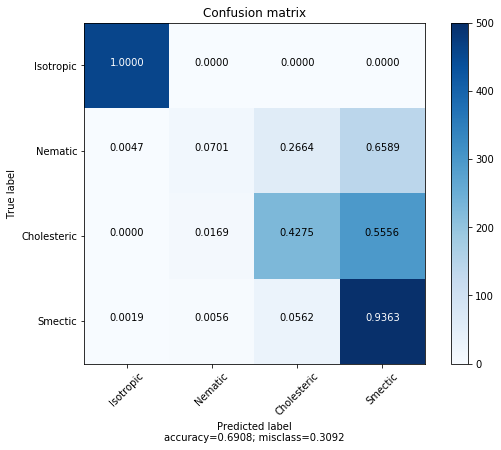

In [15]:
cm = confusion_matrix(y_true, y_pred)
target_names = ["Isotropic", "Nematic", "Cholesteric", "Smectic"]

plot_confusion_matrix(cm,
                      target_names,
                      title="Confusion matrix",
                      normalize=True,
                      save=True
                     )

## 7. Testing trained model on a video

In [16]:
import cv2
import collections

In [17]:
size = 1
queue = collections.deque(maxlen=size)

In [30]:
vid_path = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/Liquid_crystals-machine_learning/(I,N,Chol,Sm)Test_videos/Nematic_defect formation-1_Ingo_Dierking.avi"
vid_save_path = "C:/Users/Jason/Documents/" + str(file_title) + ".avi"
vid_stream = cv2.VideoCapture(vid_path)

writer = None
(W, H) = (None, None)

while True:
    (grabbed, frame) = vid_stream.read()
    if not grabbed:
        break
        
    if W is None or H is None:
        (W, H) = frame.shape[:2]
        
    output_vid = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame, (254, 254)).astype("float32")
    
    pred = trained_model.predict(np.expand_dims(frame, axis=(0,3)))
    y_predict = np.argmax(pred, axis=1)
    #queue.append(pred)
    
    label = target_names[y_predict[0]]
    #results = np.array(queue).mean(axis=0)
    #i = np.argmax(results)
    #label = target_names[i]
    
    text = "Phase: {}".format(label)
    cv2.putText(output_vid, text, (35,50), cv2.FONT_HERSHEY_SIMPLEX,
               1.25, (0, 255, 0), 5)
    
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MPEG")
        writer = cv2.VideoWriter(vid_save_path, fourcc, 30, (W,H), True)
        
    writer.write(output_vid)
    
    cv2.imshow("Output_vid", output_vid)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        break

In [31]:
writer.release()
vid_stream.release()
cv2.destroyAllWindows()